In [1]:
import mne
import numpy as np
from glob import glob
from sys import platform
import os
from blink_utils import *
import mat73

# Path to FIF files

In [3]:
SUBJECT = 5

FIF_PATH = os.path.join('..', '..', '2-mat-to-npy-fif', 'fif')
BLINK_SUMMARY_PATH = os.path.join(
    '..', 
    '..', 
    '3-find-blinks', 
    '3.1-eeglab-blinker', 
    'blinkerDumpDir', 
    f'dataSub{SUBJECT}_BlinkSummary.mat',
)

# output paths
MERGED_FIF_PATH = 'merged-fif'

DATA_FILES = glob(os.path.join(FIF_PATH, f'subject-{SUBJECT}_*.fif'))
DATA_FILES = list(set(DATA_FILES)) # only get unique paths, sub3 is somehow returning trial 66 twice
DATA_FILES = sorted(DATA_FILES) # to sort by run#
DATA_FILES

['../../2-mat-to-npy-fif/fif/subject-5_trial-00_chor-096_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-01_chor-038_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-02_chor-038_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-03_chor-101_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-04_chor-019_condition-Listening_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-05_chor-096_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-06_chor-038_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-07_chor-101_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-08_chor-101_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-09_chor-019_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-10_chor-019_condition-Imagery_raw.fif',
 '../../2-mat-to-npy-fif/fif/subject-5_trial-11_chor-03

In [4]:
print(len(DATA_FILES))
assert len(DATA_FILES)==11*8

88


Combine all raws for one subject (that is one recording session)

In [5]:
RAWS_SUB = {}

for DATA_FILE in DATA_FILES: #[:2*5]:
    
    raw = mne.io.read_raw_fif(DATA_FILE, preload=True)
    fname = str(raw.filenames[0]).split(os.path.sep)[-1].rstrip('_raw.fif')
    
    toks = fname.split('_')
    subject = int(toks[0].split('-')[-1])
    condition = toks[2] + '/' + toks[3].lstrip('condition-')

    if not subject in RAWS_SUB:
        RAWS_SUB[subject] = []
    RAWS_SUB[subject].append(raw)
    
    #print(fname, subject, condition, run)
print(RAWS_SUB)

Opening raw data file ../../2-mat-to-npy-fif/fif/subject-5_trial-00_chor-096_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-5_trial-01_chor-038_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-5_trial-02_chor-038_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-5_trial-03_chor-101_condition-Listening_raw.fif...
    Range : 0 ... 1802 =      0.000 ...    28.156 secs
Ready.
Reading 0 ... 1802  =      0.000 ...    28.156 secs...
Opening raw data file ../../2-mat-to-npy-fif/fif/subject-5_trial-04_chor-019_condition-Listening_raw

In [6]:
RAWS_SUB[SUBJECT]

[<Raw | subject-5_trial-00_chor-096_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-01_chor-038_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-02_chor-038_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-03_chor-101_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-04_chor-019_condition-Listening_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-05_chor-096_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-06_chor-038_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-07_chor-101_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-08_chor-101_condition-Imagery_raw.fif, 68 x 1803 (28.2 s), ~1.0 MiB, data loaded>,
 <Raw | subject-5_trial-09_

In [7]:
merged_raws = mne.concatenate_raws(RAWS_SUB[SUBJECT])
merged_raws

<Raw | subject-5_trial-00_chor-096_condition-Listening_raw.fif, 68 x 158664 (2479.1 s), ~82.4 MiB, data loaded>

Using matplotlib as 2D backend.


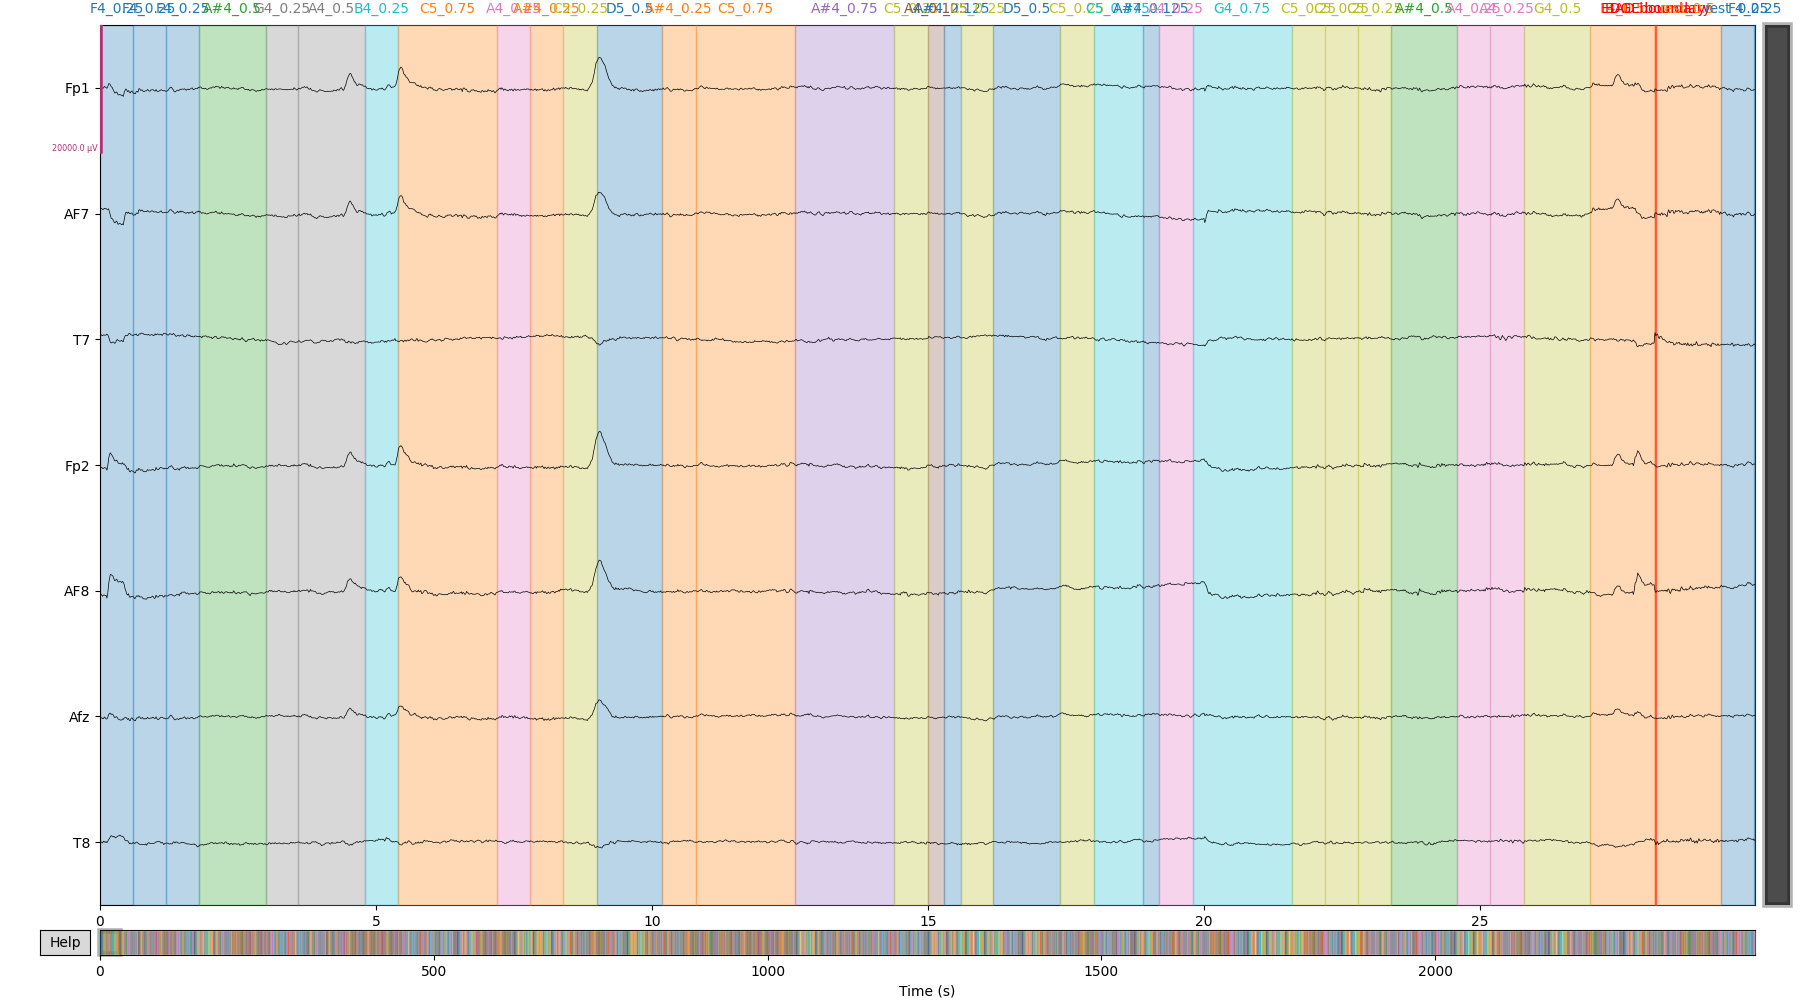

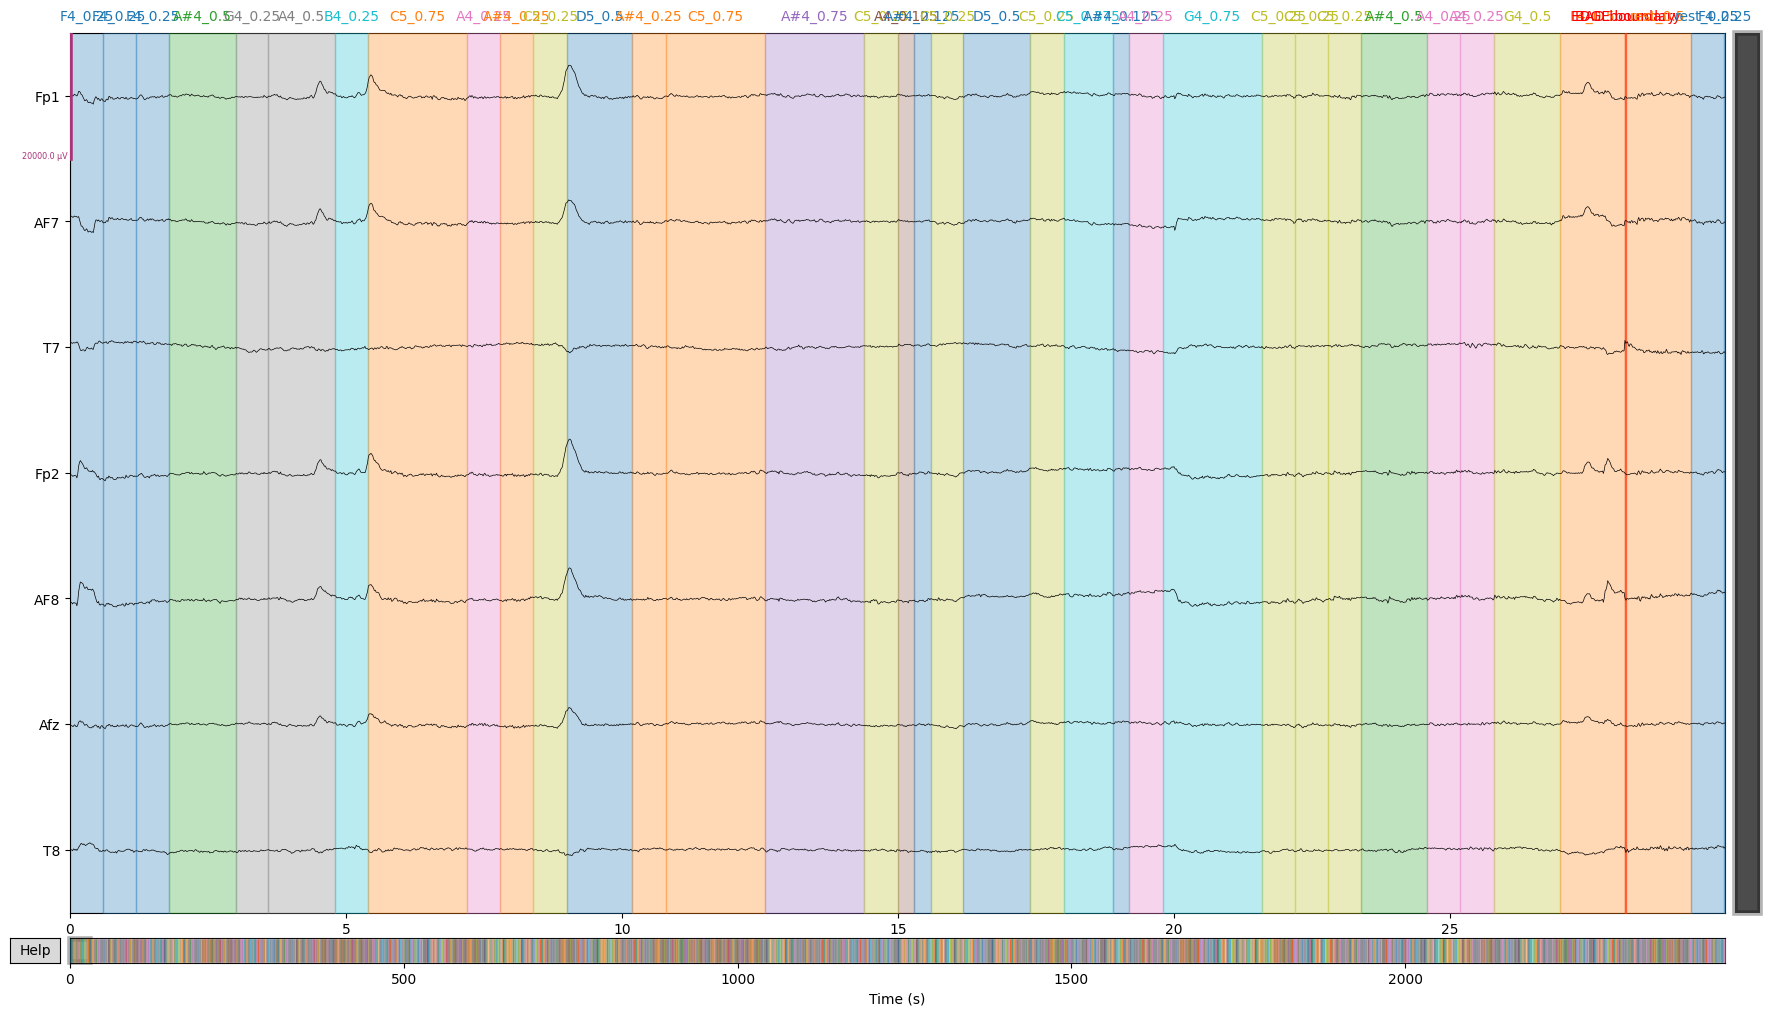

In [8]:
%matplotlib widget 
scalings = {'eeg': 10e-3}

merged_raws.plot(
    scalings = scalings,
    n_channels = 64,
    start = 0, 
    duration = 30, #28.125, #2.4*6,
    picks = ['Fp1', 'Fp2', 'AF7', 'AF8', 'Afz', 'T7', 'T8']
)

In [9]:
note_annot = merged_raws.annotations
boundary_annot = note_annot[note_annot.description == 'BAD boundary']

In [10]:
blink_summary = {}

if not SUBJECT in blink_summary.keys():
    blink_summary[SUBJECT] = mat73.loadmat(BLINK_SUMMARY_PATH)

blinks = blink_summary[SUBJECT]['blinks']
status = blinks['status']
print(f'Subject {SUBJECT}: {status}')

if type(blinks['signalData']) == list:
    n_signals = len(blinks['signalData'])
    print(f'# signals = {n_signals}')
    usedSignalIdx = np.where([x['signalNumber'] for x in blinks['signalData']] == blinks['usedSignal'])[0][0]
    signal = blinks['signalData'][usedSignalIdx]['signal']
    signalLabel = blinks['signalData'][usedSignalIdx]['signalLabel']
    numberBlinks = int(blinks['signalData'][usedSignalIdx]['numberBlinks'])
    numberGoodBlinks = int(blinks['signalData'][usedSignalIdx]['numberGoodBlinks'])
else:
    signal = blinks['signalData']['signal']
    signalLabel = blinks['signalData']['signalLabel']
    numberBlinks = int(blinks['signalData']['numberBlinks'])
    numberGoodBlinks = int(blinks['signalData']['numberGoodBlinks'])

blinkFits = blink_summary[SUBJECT]['blinkFits']
maxFrame = [int(x)-1 for x in blinkFits['maxFrame']] # convert to 0 index

# blinkPositions[:, 2]

blinkProperties = blink_summary[SUBJECT]['blinkProperties']

usedSignal = blinks['usedSignal']

print('usedSignal', usedSignal)
print('signalLabel:', signalLabel)
print('Total blinks:', numberBlinks)
print('Good blinks:', numberGoodBlinks)

params = blink_summary[SUBJECT]['params']

blinkAmpRange = params['blinkAmpRange']
goodRatioThreshold = params['goodRatioThreshold']
highCutoffHz = params['highCutoffHz']
lowCutoffHz = params['lowCutoffHz']
stdThreshold = params['stdThreshold']
shutAmpFraction = params['shutAmpFraction']
pAVRThreshold = params['pAVRThreshold']
zThresholds = params['zThresholds']
correlationThresholdTop = params['correlationThresholdTop']
correlationThresholdMiddle = params['correlationThresholdMiddle']
correlationThresholdBottom = params['correlationThresholdBottom']

for keys in [
    'stdThreshold',
    'lowCutoffHz',
    'highCutoffHz',
    'correlationThresholdBottom'
]:
    print(keys, params[keys])

Subject 5: success: 
usedSignal 1.0
signalLabel: channel1
Total blinks: 91
Good blinks: 84
stdThreshold 8.0
lowCutoffHz 1.0
highCutoffHz 20.0
correlationThresholdBottom 0.8


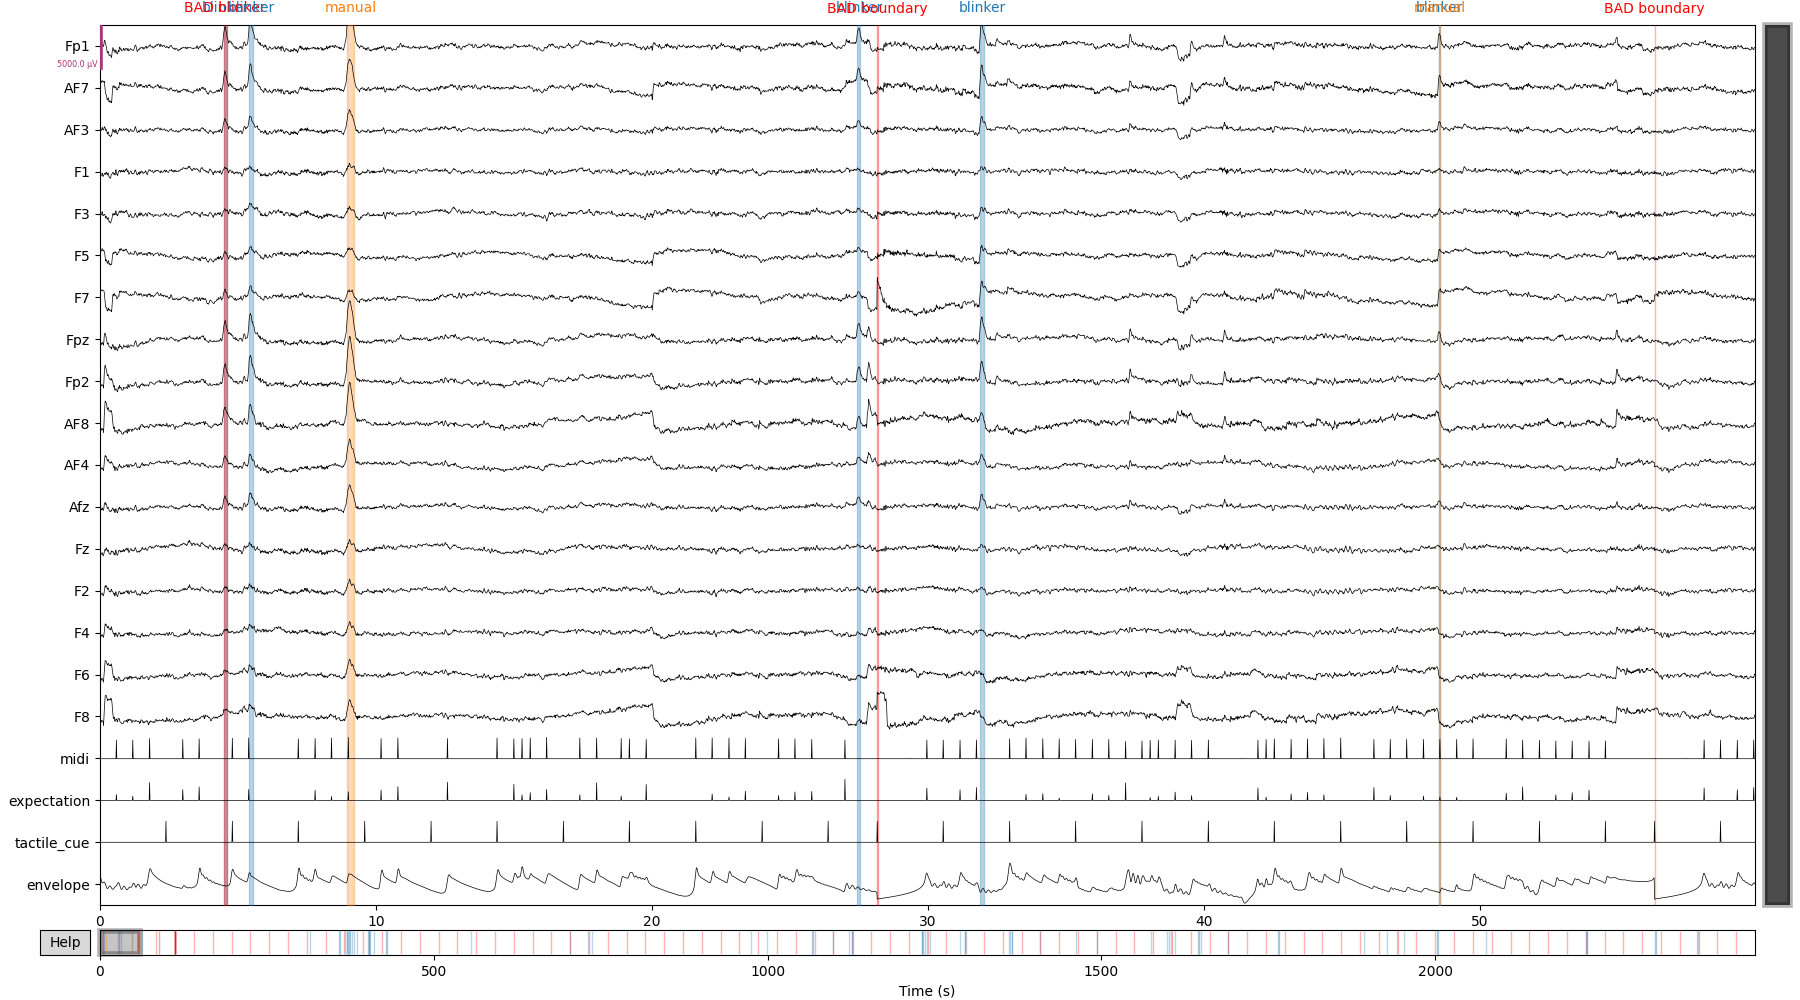

In [11]:
mne.set_config('MNE_BROWSE_RAW_SIZE','18,10') # https://mne.discourse.group/t/can-adjust-raw-plot-figure-size-using-rc-settings-in-v-24/3926/5
%matplotlib widget 

not_detected = [84] # questionable blinks not detected by BLINKER at all

t_manual_blinks = [9, 49, 55, 87.5, 113]
t_manual_blinks.extend([])
t_manual_blinks.extend([])
t_manual_blinks.extend([])
t_manual_blinks.extend([])
    
t_bad_blinker = [0, 103, 112, 117, 133, 161]
t_bad_blinker.extend([])
t_bad_blinker.extend([])
t_bad_blinker.extend([])
t_bad_blinker.extend([])

t_bad_saccades = None

# Add blink annotations (note annots will be added back later)
plot_annot(
    merged_raws, 
    boundary_annot, 
    blink_summary, 
    SUBJECT,
    usedSignalIdx = None,
    t_manual_blinks = t_manual_blinks,
    t_bad_blinker = t_bad_blinker,
    t_bad_saccades = t_bad_saccades,
    butterfly = False,
    highpass = None, #.1,
    lowpass = None, #30,
)

# Make a new raw object

In [12]:
final_raw = make_new_raw(
    merged_raws,
    signal, # blink IC
    usedSignal, # label of the blink IC
    note_annot, # note and break annotations
)

Used Annotations descriptions: ['BAD blinker', 'BAD boundary', 'blinker', 'manual']
'sweep'
Total valid blinks: 69
Total sweeps: 0


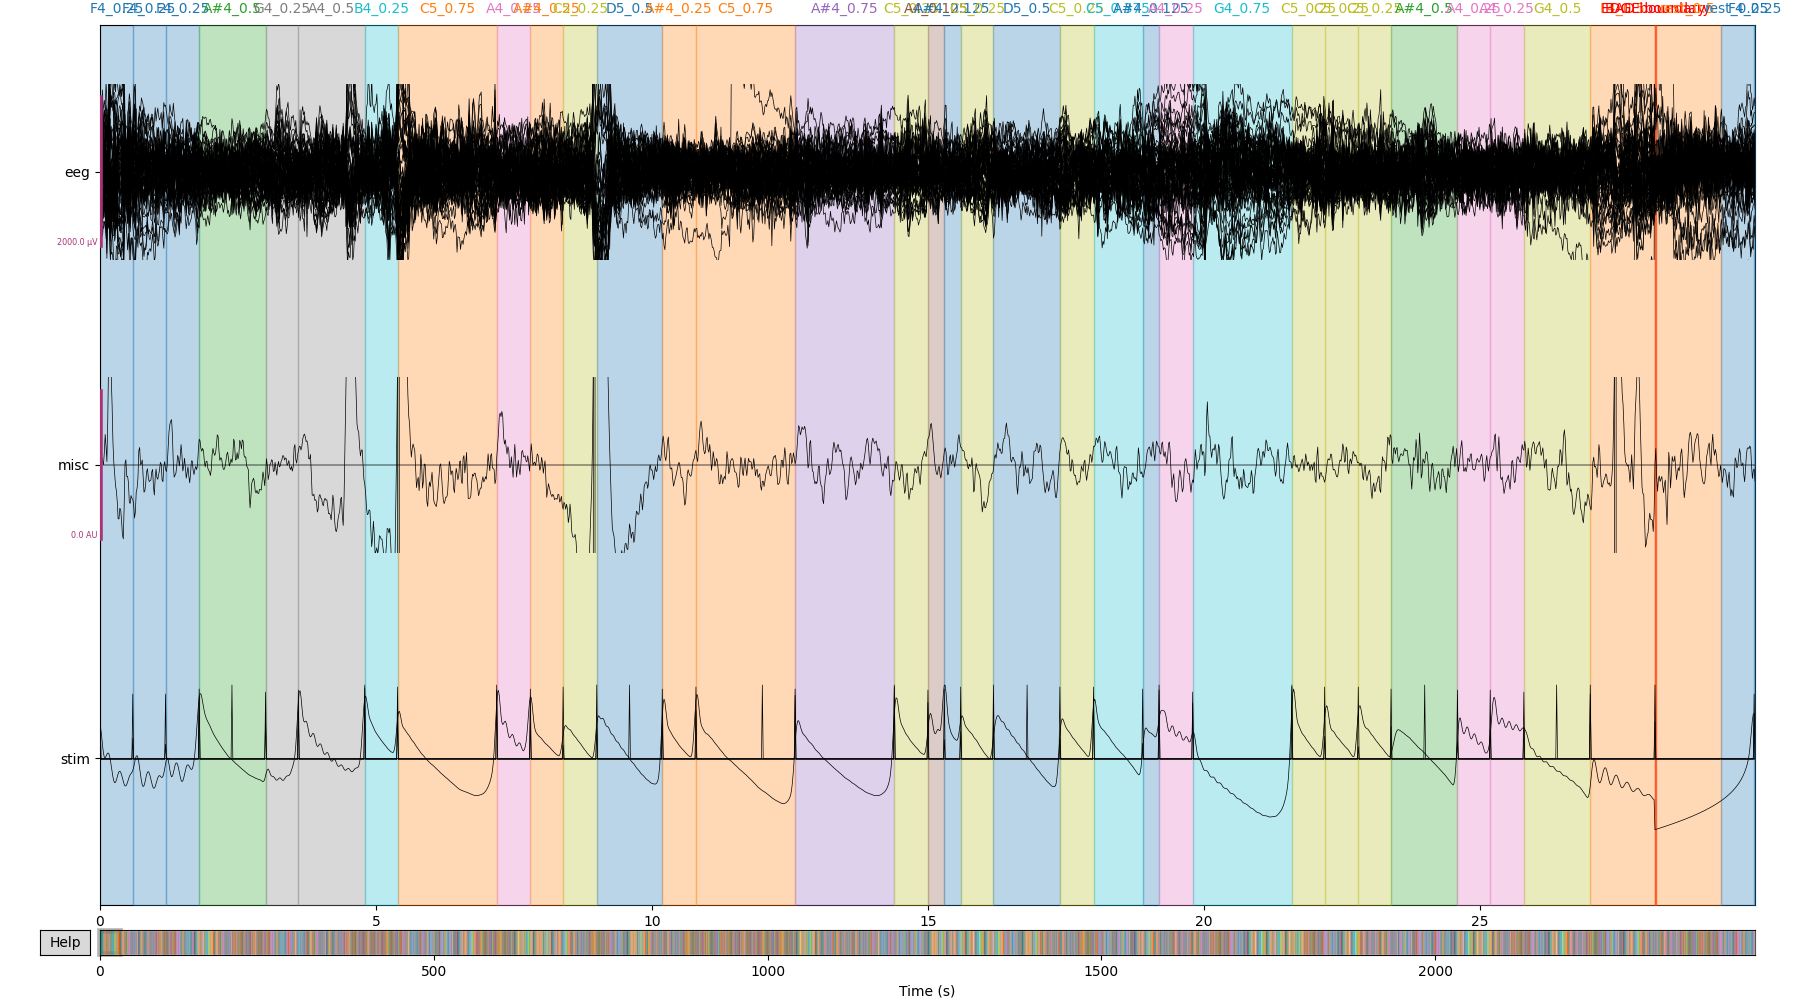

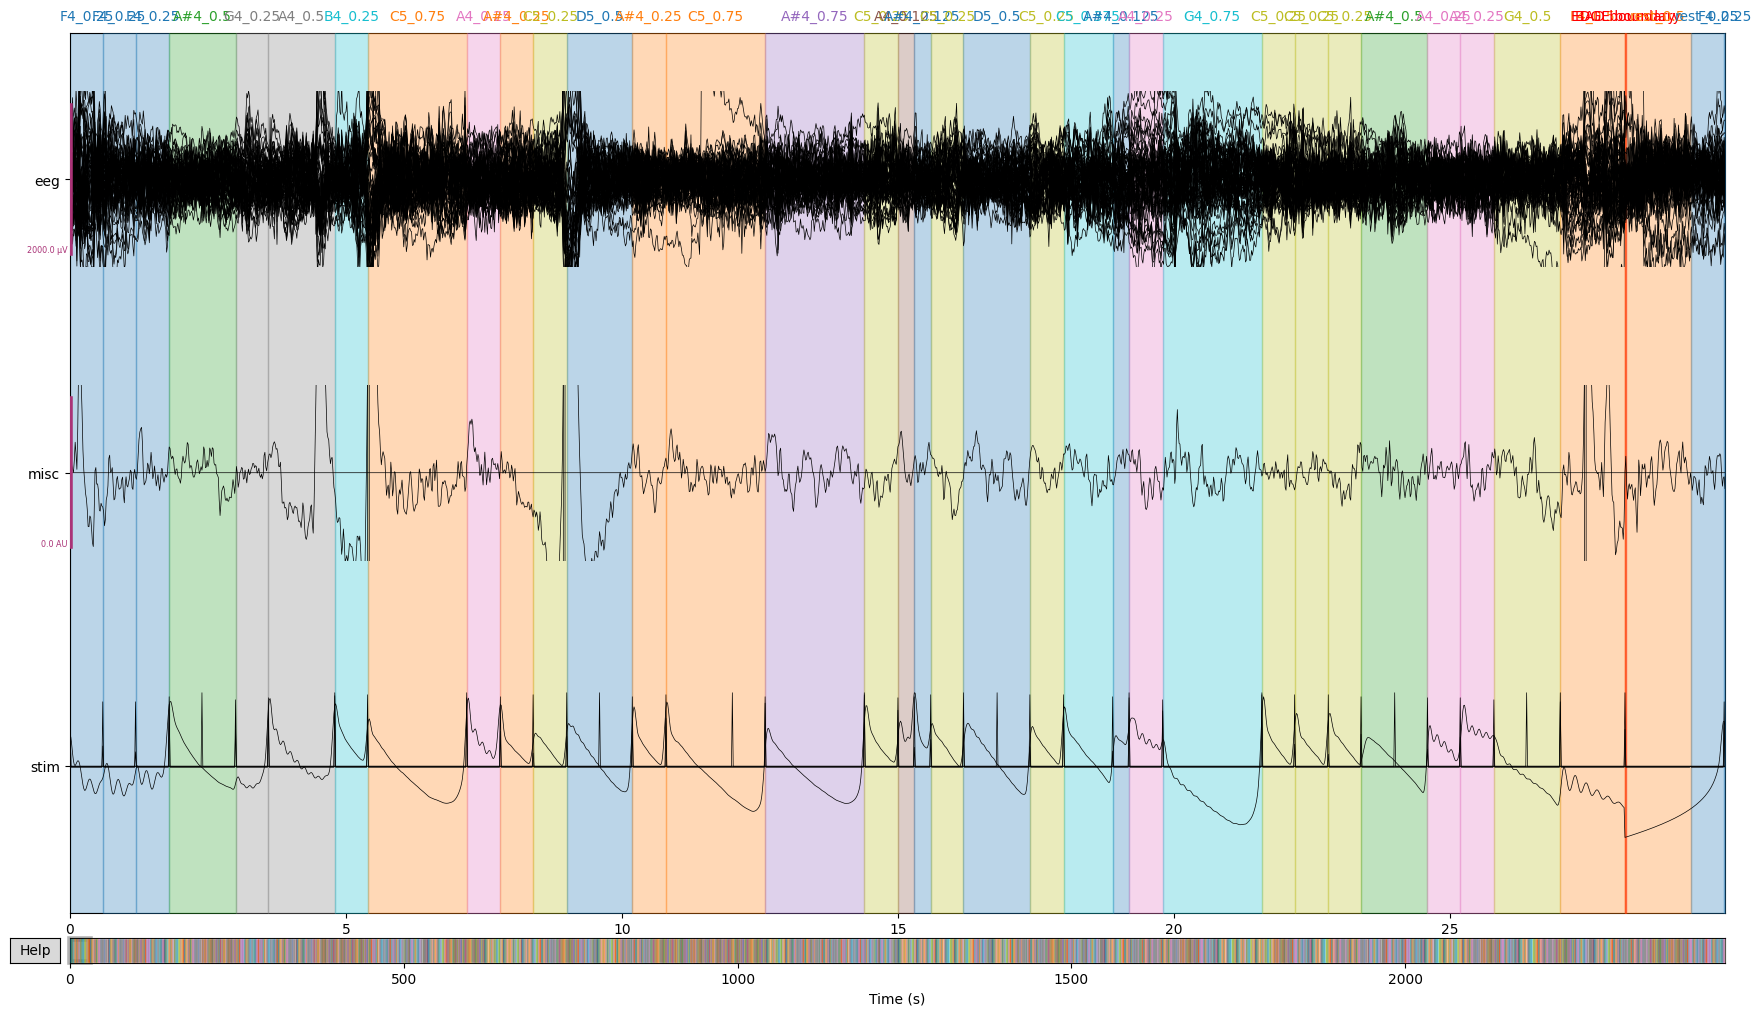

In [13]:
final_raw.plot(
    scalings = {'eeg': 1e-3, 'misc': 200e-6},
    duration = 30,
    butterfly = True,
)

In [14]:
overwrite = True
final_raw.save(
    fname = os.path.join(MERGED_FIF_PATH, f'subject-{SUBJECT}_blinks_merged_raw.fif'),
    overwrite = overwrite
)

Writing /local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-5_blinks_merged_raw.fif
Closing /local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-5_blinks_merged_raw.fif
[done]


[PosixPath('/local_disk/abhinav/eye-blink-music/3-find-blinks/3.2-manually-select-blinker-blinks/merged-fif/subject-5_blinks_merged_raw.fif')]